In [31]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# Adjust backend for environments without display (works in headless CI too)
%matplotlib inline


# results directory and files matching *_counts.txt
files = sorted(glob.glob('*_counts.txt'))
print(files)

['easy_counts.txt', 'hard_counts.txt', 'medium_counts.txt']


In [32]:
def load_counts(path):
    with open(path, 'r') as f:
        vals = [int(line.strip()) for line in f if line.strip()]
    return np.array(vals, dtype=int)

data = {}
for p in files:
    name = Path(p).stem.replace('_counts', '')
    data[name] = load_counts(p)

# show basic counts loaded
{k: v.shape[0] for k, v in data.items()}

{'easy': 100000, 'hard': 100000, 'medium': 100000}

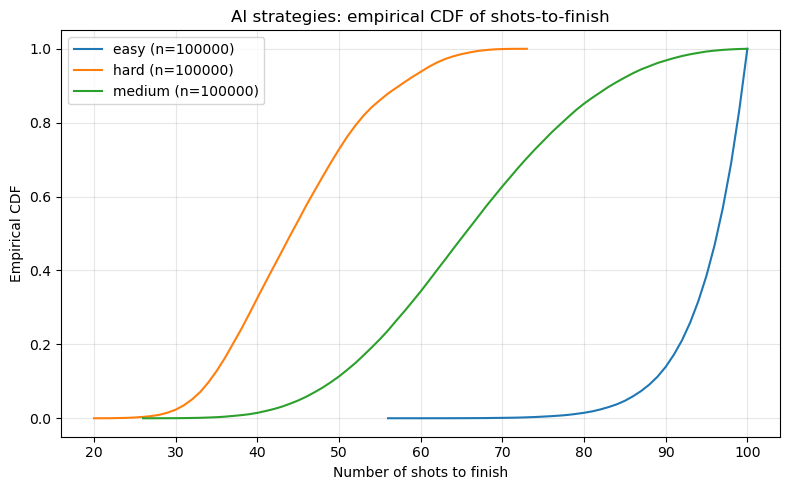

In [33]:
# compute empirical CDFs and summary stats
summary_rows = []
plt.figure(figsize=(8, 5))
for name, arr in data.items():
    if arr.size == 0:
        continue
    sorted_arr = np.sort(arr)
    # empirical CDF: for each unique x, proportion <= x
    xs = np.unique(sorted_arr)
    ys = np.searchsorted(sorted_arr, xs, side='right') / float(sorted_arr.size)
    plt.plot(xs, ys, label=f'{name} (n={sorted_arr.size})')

    # summary statistics
    summary_rows.append({
        'strategy': name,
        'n': sorted_arr.size,
        'min': int(sorted_arr.min()),
        'max': int(sorted_arr.max()),
        'mean': float(sorted_arr.mean()),
        'median': float(np.median(sorted_arr)),
        'p25': float(np.percentile(sorted_arr, 25)),
        'p75': float(np.percentile(sorted_arr, 75)),
    })

plt.xlabel('Number of shots to finish')
plt.ylabel('Empirical CDF')
plt.title('AI strategies: empirical CDF of shots-to-finish')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('ai_strategies_ecdf.png', dpi=300)
plt.show()

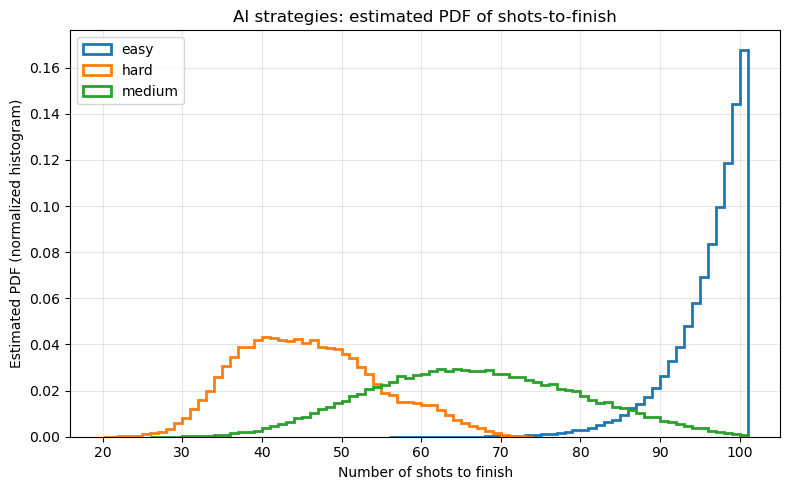

In [34]:
# plot PDFs (normalized histograms). We use discrete bins for integer shot counts
plt.figure(figsize=(8, 5))
for name, arr in data.items():
    if arr.size == 0:
        continue
    # choose bins covering the observed integer range
    mn, mx = int(arr.min()), int(arr.max())
    bins = range(mn, mx + 2)  # +2 so last integer has its own bin
    plt.hist(arr, bins=bins, density=True, histtype='step', linewidth=2, label=name)

plt.xlabel('Number of shots to finish')
plt.ylabel('Estimated PDF (normalized histogram)')
plt.title('AI strategies: estimated PDF of shots-to-finish')
plt.grid(alpha=0.3)
plt.legend()
plt.tight_layout()
plt.savefig('ai_strategies_pdf.png', dpi=300)
plt.show()